In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

In [3]:
# Step through the list and search for chessboard corners
des_images = []
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        des_images.append(cv2.drawChessboardCorners(img, (9,6), corners, ret))

In [4]:
# calibrate camera
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (720, 1280), None, None)

In [5]:
np.save('cmx_dist.npy', (cameraMatrix, distCoeffs))

In [6]:
# Example of a distorted image.
test_images_dir = './test_images/'
test_images = glob.glob(test_images_dir+'*.jpg')

In [7]:
# create a function to get camera calibration matrix
def camera_calibration(images, patternsize=(9, 6)):
    '''images: chess board images list of numpy array'''
    objpoints = []
    imgpoints = []
    nx = patternsize[0]
    ny = patternsize[1]
    objpoint = np.zeros((nx * ny, 3), np.float32)
    objpoint[:, :2] = np.mgrid[:nx, :ny].T.reshape((-1, 2))
    imagesize = images[0].shape[:-1]
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(image, patternsize)
        if ret:
            objpoints.append(objpoint)
            imgpoints.append(corners)
    ret, cameraMatrix, distCoeff, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imagesize, None, None)
    return cameraMatrix, distCoeff

In [8]:
# Create a function to undistot the image.
def undistort(image, matrix, dis):
    '''image: 3 channel numpy array'''
    return cv2.undistort(image, matrix, dis)

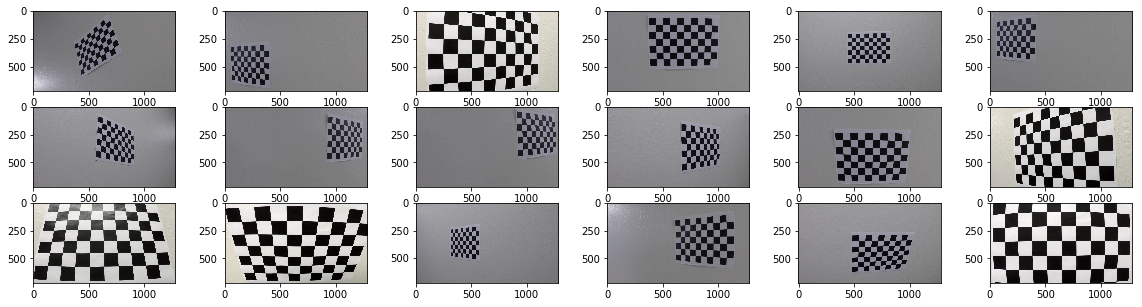

In [9]:
# show images
def show_images(images_list, cols=1):
    '''
    para: images_list, list of arrays
    '''
    fig = plt.figure(figsize=(20, 5))
    length = len(images_list)
    rows = length // cols
    for index in range(1, length-1):
        fig.add_subplot(rows, cols, index)
        plt.imshow(images_list[index], cmap='gray')
    plt.show()

# test show_images
images_list = [plt.imread(image) for image in images]
show_images(images_list, 6)

In [10]:
# test undistort
matrix, dis = camera_calibration(images_list)
test_images_list = [plt.imread(image) for image in test_images]

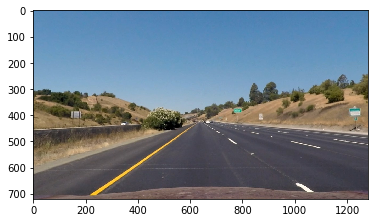

In [11]:
straight_line = './test_images/straight_lines1.jpg'

staright_line_image = undistort(plt.imread(straight_line), matrix, dis)

plt.imshow(staright_line_image)

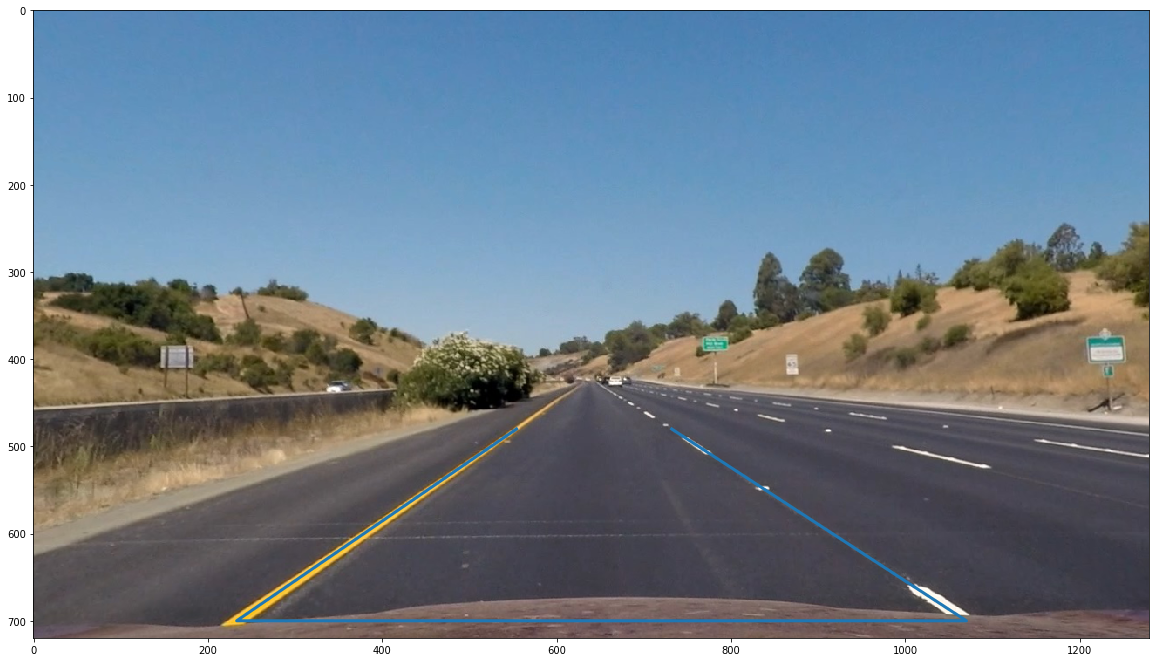

In [12]:
# Show image in gray and cut the view with four points.
firstline = 480
secondline = 700
x1 = 554
x2 = 233
x3 = 1070
x4 = 732

first_point = (x1, firstline)
second_point = (x2, secondline)
third_point = (x3, secondline)
fourth_point = (x4, firstline)
src = np.float32([first_point, second_point, third_point, fourth_point])
dst = np.float32([(x2, 0), (x2, 720), (x3, 720), (x3, 0)])
fig = plt.figure(figsize=(20, 20))
plt.imshow(staright_line_image)
plt.plot(src.T[0], src.T[1], linewidth=3)

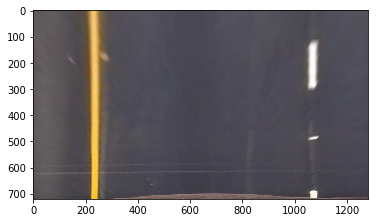

In [13]:
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
plt.imshow(cv2.warpPerspective(staright_line_image, M, (1280,720)))

In [14]:
np.save('M_Minv.npy', (M, Minv))

In [15]:
np.load('M_Minv.npy')

array([[[ -6.64381585e-01,  -1.52339443e+00,   1.06637610e+03],
        [ -4.88498131e-15,  -2.17433973e+00,   1.04368307e+03],
        [ -7.80625564e-18,  -2.37768798e-03,   1.00000000e+00]],

       [[  2.12664277e-01,  -7.00623921e-01,   5.04449223e+02],
        [ -2.22044605e-16,  -4.59909731e-01,   4.80000000e+02],
        [  8.67361738e-19,  -1.09352184e-03,   1.00000000e+00]]])